In [13]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#import data set
data=pd.read_csv('Social_Network_Ads.csv')
#data.head()

##feature aur label alag alag kiye
x=data.iloc[:,:-1].values
y=data.iloc[:,-1].values

#data split hua ha 
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

#feature scaling hui ha
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)


In [2]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [14]:
from xgboost import XGBClassifier
classifier=XGBClassifier()
classifier.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [15]:
#apna hamesha preidct ma 2d array deni ha
print(classifier.predict(sc.transform([[30,87000]])))

[0]


In [16]:
# DecisionTreeClassifier ki training ho gai so ab x_test jo k testing data ha uski prediction karni ha
y_pred=classifier.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1])

In [17]:
# y_test aur y_pred ko reshpaekar kar k akatha karega concatenate
y_pred=y_pred.reshape(len(y_pred),1)
y_test=y_test.reshape(len(y_test),1)
print(np.concatenate((y_test,y_pred),1))

[[0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]]


In [24]:
# croos validatoin k liye
from sklearn.model_selection import cross_val_score

# yeh 10 times data kodekha ga 
acc=cross_val_score(estimator = classifier, X=x_train, y=y_train, cv=10)

#mean aur standard deviation shoe hogi isse
print('Accuracy: {:0.2f}%'.format(acc.mean()*100))
print('Deviation: {:0.2f}%'.format(acc.std()*100))

#standard deviationsehamapata chalaga k kitna % accuracy makami beshi hu sakti ha

Accuracy: 88.00%
Deviation: 6.18%


In [19]:
# ab model ki prediction ki accuracy nikale
from sklearn.metrics import accuracy_score,confusion_matrix
am=accuracy_score(y_pred,y_test)
print(am)
cm=confusion_matrix(y_test,y_pred)
print(cm)

0.9
[[62  6]
 [ 4 28]]


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


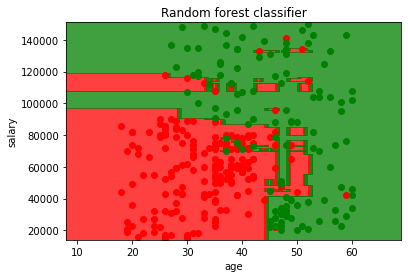

In [8]:
#visualization wala code

# graphical representation k liye
from matplotlib.colors import ListedColormap
x_set,y_set=sc.inverse_transform(x_train),y_train
x1,x2=np.meshgrid(np.arange(start=x_set[:,0].min() - 10 , stop=x_set[:,0].max() + 10 ,step=1),
                 np.arange(start=x_set[:,1].min() - 1000,  stop=x_set[:,1].max() + 1000 ,step=1))

plt.contourf(x1,x2,classifier.predict(sc.transform(np.array([x1.ravel(),x2.ravel()]).T)).reshape(x1.shape),alpha=0.75,
             cmap=ListedColormap(('red','green')))
plt.xlim(x1.min(),x1.max())
plt.ylim(x2.min(),x2.max())

for i,j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set==j,0],x_set[y_set==j,1],c=ListedColormap(('red','green'))(i),label=j)
    
plt.title('Random forest classifier')
plt.xlabel('age')
plt.ylabel('salary')
plt.show()